## Normalização
---

### Importando bibliotecas
---

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from mpl_toolkits import mplot3d

from utils import * #created function

### Lendo dados
---

In [2]:
%run Analise_survey.ipynb

In [3]:
dados.head(2)

,GENERO,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,...,PARADEIRO_ANTIGO,HIBERNACAO,RECICLAGEM,PRECO_ATUAL,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA
0,2,3300,0,24.0,5.0,2,2,0,2,0,...,0,1,2,1850,0.0,2,7.0,9.0,36.0,2
1,1,22000,0,12.0,5.0,0,1,1,3,0,...,1,1,2,9450,8.0,1,7.0,8.0,60.0,0


In [4]:
dados.columns

Index(['GENERO', 'RENDA', 'PROFISSAO', 'TEMPO_ULTIMO_APARELHO', 'IMPORTANCIA',
       'OITO_1', 'OITO_2', 'OITO_3', 'OITO_4', 'OITO_5', 'OITO_6', 'OITO_7',
       'OITO_8', 'MOTIVO_TROCA', 'CONSIDERA_CONSERTO', 'PARADEIRO_ANTIGO',
       'HIBERNACAO', 'RECICLAGEM', 'PRECO_ATUAL', 'NOVO_ATRAI', 'PROMOCAO',
       'NOTA_ATUAL', 'SATISFSACAO_NOVO', 'TEMPO_ESPERADO', 'DURACAO_ESPERADA'],
      dtype='object')

### Normalizando
---

In [5]:
variaveis = ['GENERO', 'RENDA', 'PROFISSAO', 'TEMPO_ULTIMO_APARELHO', 'IMPORTANCIA',
       'OITO_1', 'OITO_2', 'OITO_3', 'OITO_4', 'OITO_5', 'OITO_6', 'OITO_7',
       'OITO_8', 'MOTIVO_TROCA', 'CONSIDERA_CONSERTO', 'PARADEIRO_ANTIGO',
       'HIBERNACAO', 'RECICLAGEM', 'PRECO_ATUAL', 'NOVO_ATRAI', 'PROMOCAO',
       'NOTA_ATUAL', 'SATISFSACAO_NOVO', 'TEMPO_ESPERADO', 'DURACAO_ESPERADA']

In [6]:
transform_df = categoria_to_float(dados, variaveis)

In [7]:
filter_transform_df = transform_df[variaveis]

In [8]:
filter_transform_df.head()

,GENERO,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,...,PARADEIRO_ANTIGO,HIBERNACAO,RECICLAGEM,PRECO_ATUAL,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA
0,2.0,3300.0,0.0,24.0,5.0,2.0,2.0,0.0,2.0,0.0,...,0.0,1.0,2.0,1850.0,0.0,2.0,7.0,9.0,36.0,2.0
1,1.0,22000.0,0.0,12.0,5.0,0.0,1.0,1.0,3.0,0.0,...,1.0,1.0,2.0,9450.0,8.0,1.0,7.0,8.0,60.0,0.0
2,1.0,22000.0,0.0,30.0,9.0,0.0,4.0,0.0,0.0,4.0,...,5.0,4.0,1.0,3500.0,0.0,2.0,7.0,8.0,24.0,0.0
3,2.0,16500.0,0.0,24.0,4.0,0.0,0.0,0.0,3.0,3.0,...,0.0,1.0,0.0,6000.0,1.0,2.0,10.0,10.0,36.0,1.0
4,2.0,22000.0,1.0,12.0,10.0,0.0,0.0,0.0,3.0,2.0,...,0.0,4.0,2.0,9450.0,8.0,2.0,0.0,0.0,36.0,0.0


In [9]:
df_backup = filter_transform_df.copy()

In [10]:
filter_transform_df['DURACAO_ESPERADA'].value_counts()

1.0    71
2.0    44
0.0    42
Name: DURACAO_ESPERADA, dtype: int64

In [11]:
normalized_df = (filter_transform_df-filter_transform_df.min())/(filter_transform_df.max()-filter_transform_df.min())

### Range de variação
---

<AxesSubplot:>

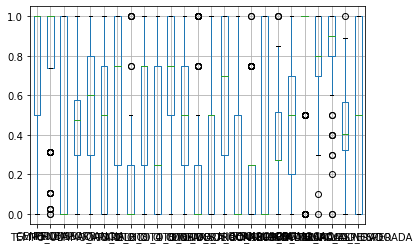

In [12]:
normalized_df.boxplot()

### Tratando os dados
---

In [13]:
#preenche Nan com a mediana da coluna
imputer = SimpleImputer(strategy='median')
imputer.fit(normalized_df)
temp = imputer.transform(normalized_df)
df_filter_nan = pd.DataFrame(temp, columns=normalized_df.columns)

### Visualizando 
---

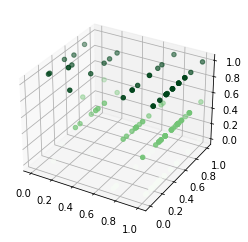

In [14]:
x = normalized_df['RENDA'].tolist()
y = normalized_df['TEMPO_ULTIMO_APARELHO'].tolist()
z = normalized_df['DURACAO_ESPERADA'].tolist()
dimensional_graph(x,y,z)

### K-means
---

In [15]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_filter_nan)
    distortions.append(kmeanModel.inertia_)

C:\Users\FernandoFincatti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


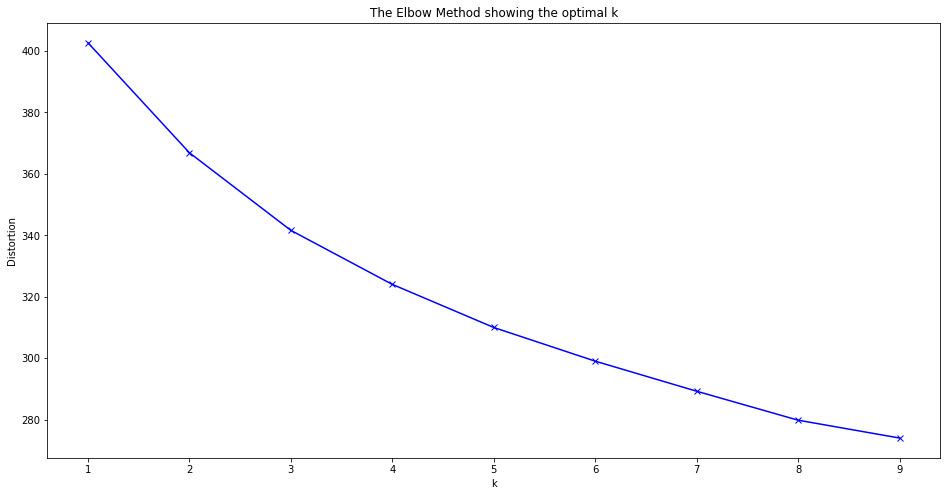

In [16]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
#define os pontos no espaço
three_means = cluster.MiniBatchKMeans(n_clusters=3)

#fit no algoritmo
three_means.fit(df_filter_nan)
saida = three_means.predict(df_filter_nan)
df_filter_nan['CLUSTER'] = saida

C:\Users\FernandoFincatti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [18]:
df_filter_nan.to_excel("cluster_normalizado.xlsx")

In [19]:
df_filter_nan.head()

,GENERO,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,...,HIBERNACAO,RECICLAGEM,PRECO_ATUAL,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA,CLUSTER
0,1.0,0.105263,0.0,0.368421,0.5,0.5,0.50,0.00,0.50,0.00,...,0.00,1.0,0.111650,0.0,1.0,0.7,0.9,0.405405,1.0,0
1,0.5,1.000000,0.0,0.157895,0.5,0.0,0.25,0.25,0.75,0.00,...,0.00,1.0,0.849515,0.8,0.5,0.7,0.8,0.729730,0.0,0
2,0.5,1.000000,0.0,0.473684,0.9,0.0,1.00,0.00,0.00,1.00,...,0.75,0.5,0.271845,0.0,1.0,0.7,0.8,0.243243,0.0,2
3,1.0,0.736842,0.0,0.368421,0.4,0.0,0.00,0.00,0.75,0.75,...,0.00,0.0,0.514563,0.1,1.0,1.0,1.0,0.405405,0.5,0
4,1.0,1.000000,1.0,0.157895,1.0,0.0,0.00,0.00,0.75,0.50,...,0.75,1.0,0.849515,0.8,1.0,0.0,0.0,0.405405,0.0,1


### Redução de dimensionalidade
---

In [20]:
dimedimension_reduction = df_filter_nan[variaveis]

In [21]:
centroids, labels = three_means.cluster_centers_, three_means.labels_

In [22]:
pca_model = PCA(n_components=2) #redução para 3 eixos
pca_model.fit(dimedimension_reduction) #fit model
T = pca_model.transform(dimedimension_reduction) #transform no'normalized model'
centroid_pca = pca_model.transform(centroids) #transform 'centroids of KMean'

In [23]:
colors = ['blue', 'red', 'green'] #cores do plot
features_colors = [ colors[labels[i]] for i in range(len(T)) ] #assimila uma cor para cada feature

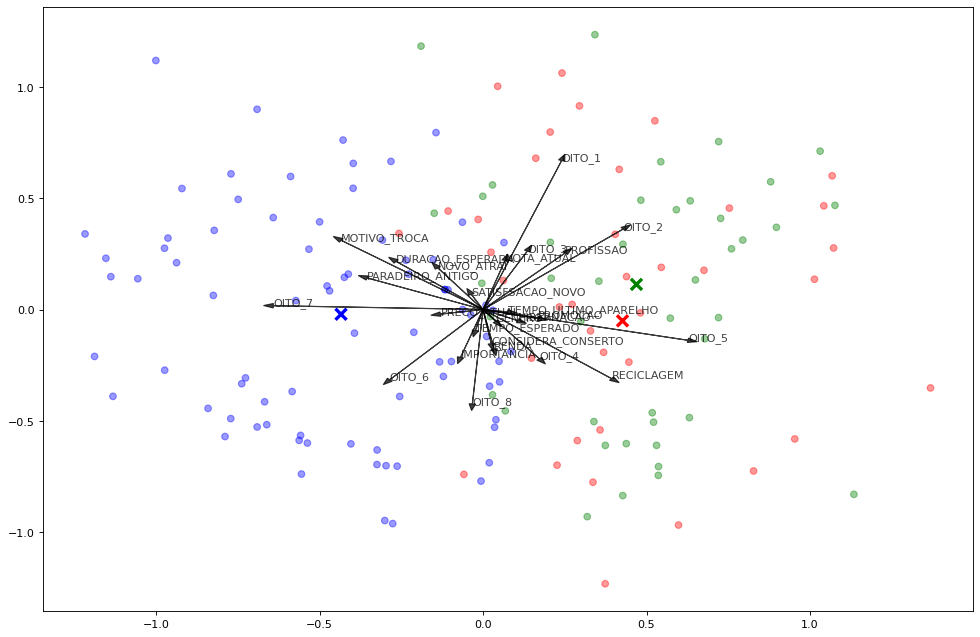

In [24]:
plt.figure(figsize=(15, 10), dpi=80)

# plot PCA componentes
plt.scatter(T[:, 0], T[:, 1],
            c=features_colors, marker='o',
            alpha=0.4
        )

# plot centroids
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors
        )

xvector = pca_model.components_[0] * max(T[:,0])
yvector = pca_model.components_[1] * max(T[:,1])
columns = dimedimension_reduction.columns

for i in range(len(columns)):
    # vetores
    plt.arrow(0,
              0,
              xvector[i], yvector[i],
              color='black',
              width=0.0005,
              head_width=0.02,
              alpha=0.75
            )
    
    # nome das features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='black', alpha=0.75)

plt.show()

### Adicionando clusterização na base original
---

In [25]:
dados['CLUSTER'] = df_filter_nan['CLUSTER']

In [26]:
dados.head(5)

,GENERO,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,...,HIBERNACAO,RECICLAGEM,PRECO_ATUAL,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA,CLUSTER
0,2,3300,0,24.0,5.0,2,2,0,2,0,...,1,2,1850,0.0,2,7.0,9.0,36.0,2,0
1,1,22000,0,12.0,5.0,0,1,1,3,0,...,1,2,9450,8.0,1,7.0,8.0,60.0,0,0
2,1,22000,0,30.0,9.0,0,4,0,0,4,...,4,1,3500,0.0,2,7.0,8.0,24.0,0,2
3,2,16500,0,24.0,4.0,0,0,0,3,3,...,1,0,6000,1.0,2,10.0,10.0,36.0,1,0
4,2,22000,1,12.0,10.0,0,0,0,3,2,...,4,2,9450,8.0,2,0.0,0.0,36.0,0,1
